# **SUPPORT VECTOR MACHINES (SVM)**

# **Introduction**

Let $\textbf{x}_i, \ i=1,2\ldots, N$,  be the feature vectors of the training set, $X$.

These belong to either of two classes, $\omega_1$, $\omega_2$, which are assumed to be **linearly separable**.

The goal is **to design a hyperplane**
$$g(\textbf{x}) = \textbf{w}^T \textbf{X} + w_0 = 0$$

that **classifies correctly** all the training vectors. Note that such a hyperplane **is not unique**.



For instance, the following figure shows two possible hyperplane solutions

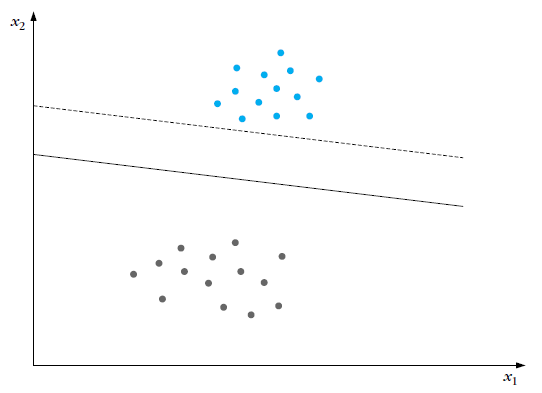

Both hyperplanes serve their purpose for the training set. However, in practice the full line has a better chance to classify the real data with less risk of error than the dotted line. Because this hyperplane leaves more *space* on both sides, or rather, it **is further away** from all the training points overall.

The capability of a classifier, designed using the training data set, to operate satisfactorily with data outside this set is known as the **generalization performance** of the classifier.

The idea behind the **SVM** is to choose the hyperplane classifier that leaves the **maximum margin** of both classes.

## **Margin**

Let us now quantify the term **margin** that a hyperplane leaves from both classes.

Every hyperplane is characterized by **its direction** (determined by $\textbf{w}$) and its **exact position in space** (determined by $w_0$).

Since we want to give no preference to either of the classes, then it is reasonable **for each direction** (the positive and negative side with respect to the hyperplane) to select that hyperplane which has the **same distance**  $z_i$ from the respective **nearest points** in $\omega_1$, $\omega_2$.

#### An example of a linearly separable two-class problem with two possible linear classifiers.

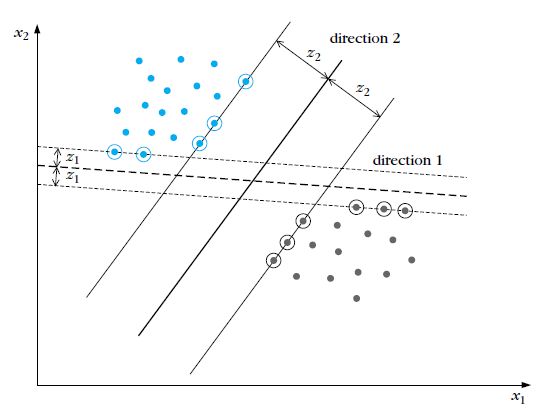

The goal is to search for the direction that gives the **maximum possible margin**. However, each hyperplane is determined within a scaling factor. We will free ourselves from it, by appropriate scaling of all the candidate hyperplanes.

Recall that the **distance of a point from a hyperplane** is given by
$$z=\frac{|g(\textbf{x})|}{\|\textbf{w}\|}$$

Without loss of generality, let be $\textbf{x}_1$ and $\textbf{x}_2$ (any of) the nearest points in $\omega_1$, $\omega_2$, and let $z_1$ and $z_2$ be their distances to the hyperplane defined by $\textbf{w}, w_0$.

Given a vector $\textbf{w}$ the data points such that $g(x)=\pm 1$ are known as **support vectors**. In other words, they are the training vectors that are closest to the linear classifier, and they constitute the critical elements of the training set.

If we force scale $\textbf{w}, w_0$  to force
\begin{eqnarray}
g(\textbf{x}_1) &=&1 \\
g(\textbf{x}_2) &=&-1
\end{eqnarray}
the **margin** to each class depends only on the norm of vector $\textbf{w}$. Furthermore, $z_1=z_2$



So, our problem becomes

\begin{eqnarray}
  \max \quad z_1 + z_2 & & \\
  \text{s.t.} \quad g(\textbf{x})&\geq& 1, &\quad \forall \textbf{x}\in \omega_1\\
  g(\textbf{x}) &\leq& -1 &\quad \forall \textbf{x}\in \omega_2
\end{eqnarray}

This is equivalent with
\begin{eqnarray}
  \max \quad \frac{1}{\|\textbf{w}\|}+\frac{1}{\|\textbf{w}\|} & & \\
  \text{s.t.} \quad \textbf{w}^T \textbf{x} + w_0 &\geq& 1, &\quad \forall \textbf{x}\in \omega_1\\
\textbf{w}^T \textbf{x} + w_0 &\leq& -1 &\quad \forall \textbf{x}\in \omega_2
\end{eqnarray}

Note that
$$\max_{\textbf{w}} \ \frac{2}{\|\textbf{w}\|} = \min_{\textbf{w}}\ \frac{1}{2}\|\textbf{w}\|$$
And although the minimum value of $\frac{1}{2}\|\textbf{w}\|$ is not necessarily the same as the minimum value of $\frac{1}{2}\|\textbf{w}\|^2$, it is true that
$$\arg \max_{\textbf{w}} \ \|\textbf{w}\| =\arg \max_{\textbf{w}}\ \|\textbf{w}\|^2 $$

## **Optimization problem**

The **SVM** can be modeled as a **constrained nonlinear optimization problem**.

For each $\textbf{x}_i$, we denote the corresponding class indicator by
$$y_i = \begin{cases} +1 & \text{for } \omega_1\\ -1 & \text{for } \omega_2 \end{cases}$$

The task can now be summarized as:
- Compute the parameters $\textbf{w}, w_0$ of the hyperplane so that to:
\begin{eqnarray}
  \min  \  J(\textbf{w}, w_0) \equiv  \frac{1}{2}\|\textbf{w}\|^2 & &\\
  \text{s.t.} \qquad  y_i \left( \textbf{w}^T \textbf{x}_i +w_0\right) &\geq& 1, \qquad i=1,2,\ldots,N
\end{eqnarray}

Minimizing the norm makes the margin maximum. This is a **nonlinear (quadratic) optimization** task subject to a **set of linear inequality constraints**.

The optimum hyperplane classifier is known a **Support Vector Machine**. Using optimization theory it can be shown that the optimal hyperplane classifier of a support vector machine **is unique**

## **Nonseparable classes**

When the classes are not separable, the above setup is no longer valid.

Recall that the **margin** is defined as the distance between the pair of parallel hyperplanes described by
$$\textbf{w}^T \textbf{x} +w_0 = \pm 1$$

The training feature vectors now belong to one of the following three categories:

* Vectors that fall **outside the band** and are **correctly classified**. These vectors comply with the constraints
$$ y_i \left( \textbf{w}^T \textbf{x}_i +w_0\right) \geq 1 $$

* Vectors falling **inside the band** and are **correctly classified**. These points satisfy the inequality
$$ 0\leq y_i \left( \textbf{w}^T \textbf{x}_i +w_0\right) < 1$$
* Vectors that are **misclassified**. They obey the
inequality
$$ y_i \left( \textbf{w}^T \textbf{x}_i +w_0\right) \geq 0$$

All three cases can be treated under a single type of constraints by introducing
a new set of variables $\varepsilon_i$, known as **slack variables**:
$$ y_i \left( \textbf{w}^T \textbf{x}_i +w_0\right) \geq 1-\xi_i, \qquad i=1,\ldots, N $$

So,
* The first category of data corresponds to
$$\xi_i = 0$$
* The second to
$$0< \xi_i \leq 1$$
* And the third to
$$\xi_i > 1$$

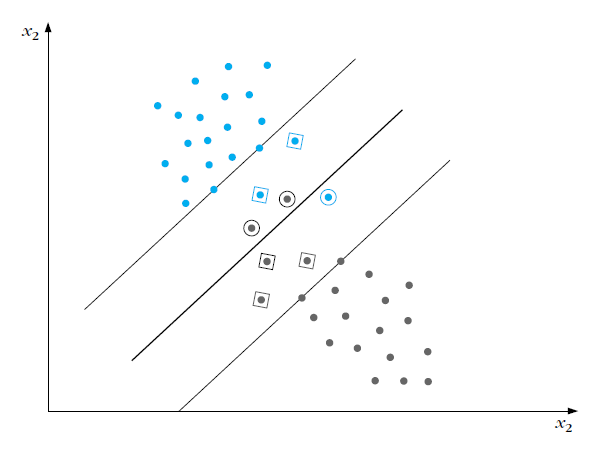

The goal now is to make the margin as large as possible but at the same time to keep the number of points with $\xi>0$ 0 as small as possible.


\begin{eqnarray*}
		\min_{\textbf{w}, w_0} J(\textbf{w}, w_0, \xi)&=& \frac{1}{2}||\textbf{w}||^2+C\sum_{i=1}^N \xi_i\\
		\text{s.t.} & & y_i (\textbf{w}^T\textbf{x}_i + w_0) \geq 1-\xi_i,& \qquad i=1,\ldots,N\\
		& & \xi_i \geq 0,& \qquad i=1,2,\ldots,N
\end{eqnarray*}

The parameter $C$ is a positive constant that controls the relative influence of the two competing terms.

This problem is known as **soft margin SVM** or **$C$-SVM**


## **The $\nu$-SVM**

There exists a closer relation between parameter $C$ and the width of the margin obtained as a result of the optimization process, but the relation is not transparent.

To this end, a **variant** of the soft margin SVM was introduced. The margin is defined by the pair of hyperplanes

$$\textbf{w}^T \textbf{x}+w_0 = \pm \rho$$
and $\rho \geq 0$ is left as a free variable to be optimized.

Under this new context, the primal problem can now be formulated as



\begin{eqnarray*}
		\min_{\textbf{w}, w_0} J(\textbf{w}, w_0, \xi)&=& \frac{1}{2}||\textbf{w}||^2+\nu\rho+\frac{1}{N}\sum_{i=1}^N \xi_i\\
		\text{s.t.} & & y_i (\textbf{w}^T\textbf{x}_i + w_0) \geq \rho-\xi_i,& \qquad i=1,\ldots,N\\
		& & \xi_i \geq 0,& \qquad i=1,2,\ldots,N\\
    & & \rho \geq 0
\end{eqnarray*}


To understand the role of $\rho$, note that for $\xi_i=0$ the first constraint states that the margin separating the two classes is equal to $\frac{2\rho}{\|\textbf{w}\|}$.

In the previous formulation, also known as **$\nu$-SVM**, we simply **count and average the number of points** with  $\xi_i>0$, whose number is now controlled by the margin variable $\rho$.

The larger the $\rho$ the wider the margin and the higher the number of points within the margin, for a specific direction $\textbf{w}$.

The parameter $\nu$ controls the influence of the second term in the cost function, and its value lies in the range $[0, 1]$.

In the literature it has been shown that the **$\nu$-SVM** and the **$C$-SVM** lead to the same solution for appropriate values of $C$ and $\nu$.



Although both SVM formulations result in the same solution, for appropriate
choices of $\nu$ and $C$ the $\nu$-SVM offers certain advantages to the designer.

> It leads to a geometric interpretation of the SVM task for nonseparable classes.

> Furthermore, the constant $\nu$, controlled by the designer, offers itself to serve two important bounds:
* The **error rate**  $P_e$ on the training set is upper-bounded as
$$P_e = \leq \nu$$
where $P_e$ is the proportion of errors with respect to the number of training points.
* The **number of the resulting support vectors** $N_s$
$$N \nu \leq N_s$$

The number of support vectors, $N_s$, is very important for the performance of the classifier in practice.
* First,  it directly affects the **computational load**, since large $N_s$ means that a large number of inner products are to be computed for classifying
an unknown pattern.
* Second, a large number of support vectors can limit the generalization performance of the SVM.